In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import utils
import preprocessing

In [38]:
df = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [39]:
params = { 'objective': ['binary:logistic', 'binary:logitraw', 'binary:hirenge', 'g:squarederror', 'reg:squaredlogerror'], 'n_estimators':range(50,400,50), 'max_depth':range(1,8,1), 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'booster': ['gbtree', 'gblinear', 'dart'] }
model = xgb.XGBClassifier()

In [40]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [42]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

In [47]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [43]:
score

0.8600232293561194

In [44]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6182
           1       0.72      0.45      0.55      1959

    accuracy                           0.82      8141
   macro avg       0.78      0.70      0.72      8141
weighted avg       0.81      0.82      0.81      8141



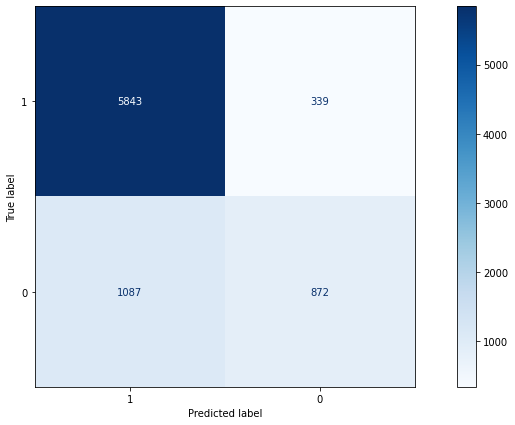

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

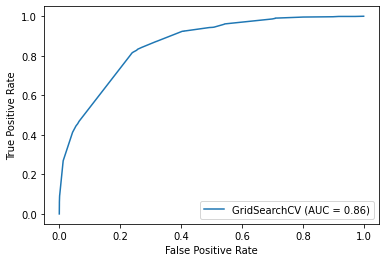

In [46]:
plot_roc_curve(gscv, X_test, y_test)